<a href="https://colab.research.google.com/github/PavloZakala/CNN/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from PIL import Image, ImageOps
from io import BytesIO

url = "https://upload.wikimedia.org/wikipedia/commons/4/45/Eopsaltria_australis_-_Mogo_Campground.jpg"


# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
# }
# 
# response = requests.get(url, headers=headers)
# response.raise_for_status()

# Open directly from bytes
bird_color = Image.open('bird.jpg')
bird_gray = ImageOps.grayscale(bird_color)


# Типи згорткових шарів

## Класичний згортковий шар

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Fw-ehcNBR9byHtho-Rxbtw.gif" alt="drawing" width="500"/>


https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [2]:
import torch
from torch import nn

from matplotlib import pyplot as plt

def show_torch_array(img, channel=0):
    plt.imshow(img[0, :, :].numpy())

    c, h, w = img.shape
    for i in range(w):
        for j in range(h):
            plt.text(j, i, f"{float(img[channel, i, j]):.2f}", ha="center", va="center", color="w", fontsize=7)
    plt.show()

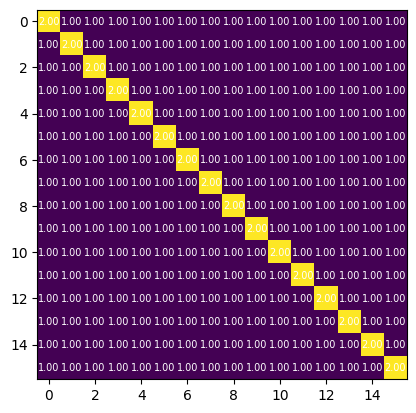

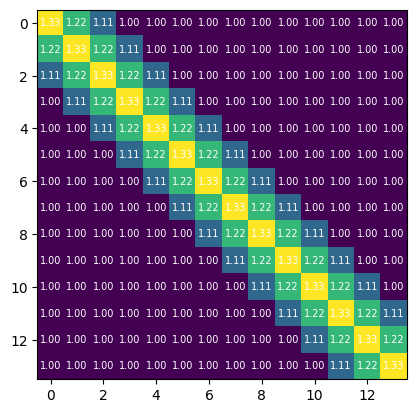

In [3]:
in_channels = 1
out_channels = 1
kernel_size = 3
stride = 1
padding = 0

conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/9)

ones_image = torch.ones(1, 16, 16) + torch.eye(16)
show_torch_array(ones_image)

out = conv_layer(ones_image)
show_torch_array(out)


array([[[120.362915, 120.41732 , 120.46719 , ..., 117.89082 ,
         117.818275, 117.772934],
        [120.37199 , 120.42186 , 120.467186, ..., 117.85003 ,
         117.7752  , 117.73665 ],
        [120.35159 , 120.40373 , 120.45133 , ..., 117.8137  ,
         117.73206 , 117.691246],
        ...,
        [137.10472 , 137.16373 , 137.18187 , ..., 145.24033 ,
         146.17911 , 147.20403 ],
        [137.13872 , 137.1773  , 137.17734 , ..., 144.55103 ,
         145.53062 , 146.67798 ],
        [137.11603 , 137.13875 , 137.13197 , ..., 144.30159 ,
         145.14967 , 146.10202 ]]], shape=(1, 2904, 4366), dtype=float32)

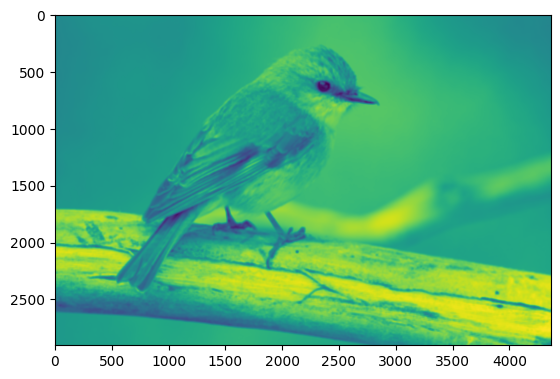

In [4]:
import numpy as np

conv_layer = nn.Conv2d(in_channels, out_channels, stride=stride, padding=padding, kernel_size=21, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1 / 441)

input_img = np.array(bird_gray).astype(float)
out = conv_layer(torch.asarray(input_img, dtype=torch.float32).unsqueeze(0))

plt.imshow(out.numpy()[0])
out.numpy()

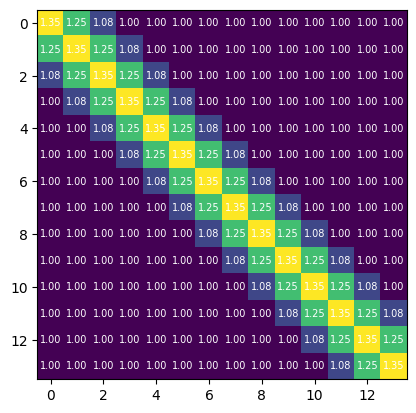

In [5]:
import numpy as np

def gausian_kernel(size, sigma=1):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g / g.sum()

conv_layer = nn.Conv2d(1, 1, 3, 1, 0, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data = torch.asarray(gausian_kernel(3, 1), dtype=torch.float32).reshape(1, 1, 3, 3)

out = conv_layer(ones_image)
show_torch_array(out)

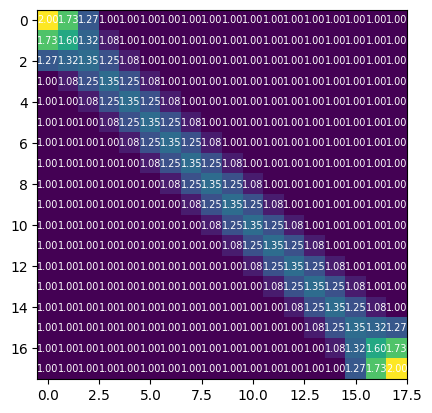

In [6]:
conv_layer = nn.Conv2d(1, 1, 3, 1, 2, bias=False, padding_mode="replicate")
conv_layer.weight.requires_grad = False
conv_layer.weight.data = torch.asarray(gausian_kernel(3, 1), dtype=torch.float32).reshape(1, 1, 3, 3)

out = conv_layer(ones_image)
show_torch_array(out)

torch.Size([1, 1, 1, 1])


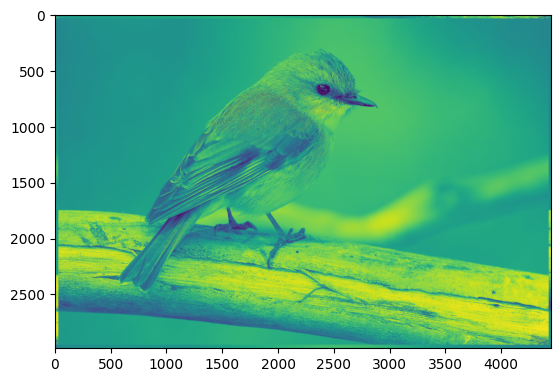

In [7]:
conv_layer = nn.Conv2d(1, 1, 1, 1, 30, bias=False, padding_mode="circular")
conv_layer.weight.requires_grad = False
print(conv_layer.weight.data.shape)

conv_layer.weight.data = torch.asarray([[1.0]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

out = conv_layer(torch.asarray(input_img, dtype=torch.float32).unsqueeze(0))
plt.imshow(out.numpy()[0])

# 16x 16 -> 14x14
#               + ->
# -> 14x14

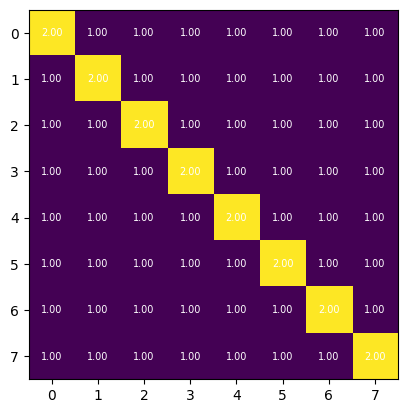

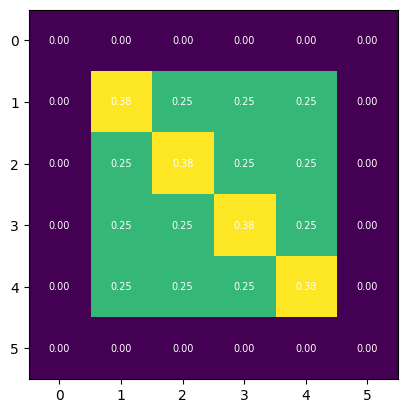

In [8]:
conv_layer = nn.Conv2d(1, 1, 2, 2, 2, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/16) # = torch.asarray(gausian_kernel(3, 1), dtype=torch.float32).reshape(1, 1, 3, 3)

ones_image = torch.ones(1, 8, 8) + torch.eye(8)
show_torch_array(ones_image)

out = conv_layer(ones_image)
show_torch_array(out)

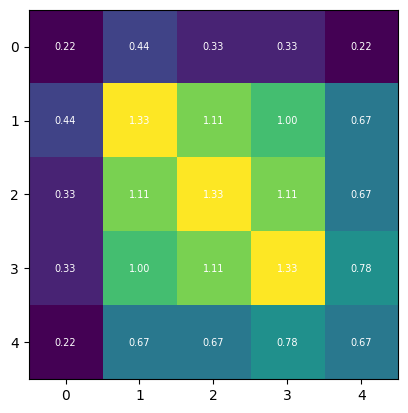

In [9]:
conv_layer = nn.Conv2d(1, 1, 3, 2, 2, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/9)

out = conv_layer(ones_image)
show_torch_array(out)

torch.Size([3, 1, 3, 3])


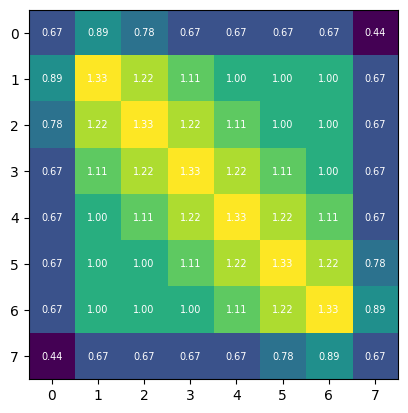

In [10]:
conv_layer = nn.Conv2d(1, 3, 3, 1, 1, bias=False)
conv_layer.weight.requires_grad = False
print(conv_layer.weight.data.shape)
conv_layer.weight.data.fill_(1/9)

out = conv_layer(ones_image)
show_torch_array(out)

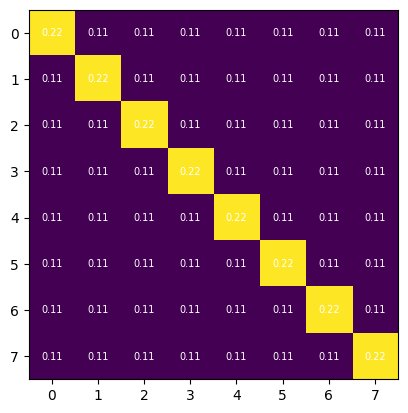

In [11]:
# 1x1 Convolution
conv_layer = nn.Conv2d(1, 3, 1, 1, 0, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/9)

out = conv_layer(ones_image)
show_torch_array(out)

# Завдання

Зібрати з блоків шар ResNeXt
https://arxiv.org/pdf/1611.05431 - ДЗ

# Pooling layers

https://pytorch.org/docs/stable/nn.html#pooling-layers



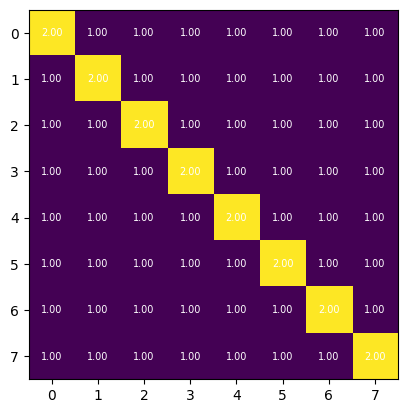

In [12]:
max_pool = nn.MaxPool2d(2, stride=2, padding=0)

ones_image = torch.ones(1, 16, 16) + torch.eye(16)

out = max_pool(ones_image)
show_torch_array(out)

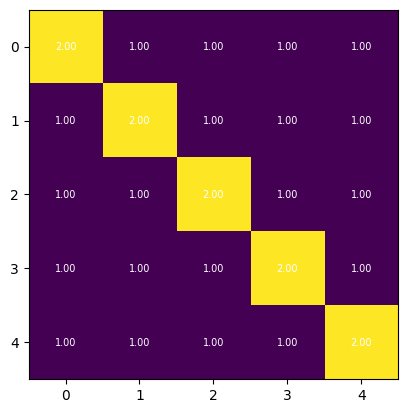

In [13]:
max_pool = nn.MaxPool2d(3, 3, 0)

out = max_pool(ones_image)
show_torch_array(out)

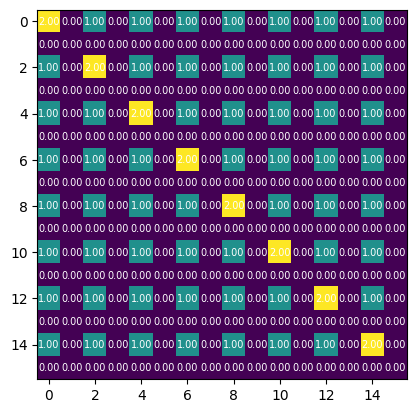

In [14]:
pool = nn.MaxPool2d(2, stride=2, return_indices=True)
unpool = nn.MaxUnpool2d(2, stride=2)

output, indices = pool(ones_image)
out = unpool(output, indices)

show_torch_array(out)

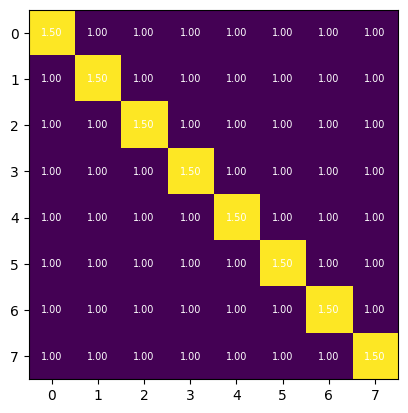

In [15]:
avg_pool = nn.AvgPool2d(2, 2, 0)

out = avg_pool(ones_image)
show_torch_array(out)

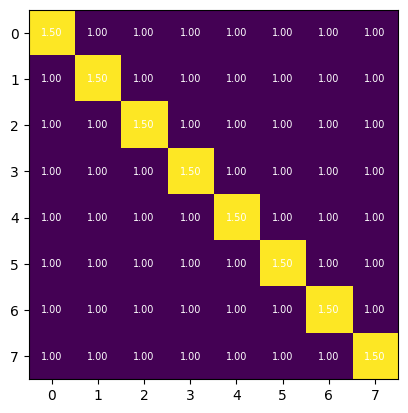

In [16]:
# Як зібрати AvgPool2d з допомогою Conv2d?

conv_layer = nn.Conv2d(1, 1, 2, 2, 0, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/4)

out = avg_pool(ones_image)
show_torch_array(out)

# Задача

Написати реалізацію операцій forward та backward для Conv2d

In [19]:
import torch
import torch.nn as nn
from torch.autograd import Function

class MyConv2dFunction(Function):
    @staticmethod
    def forward(ctx, x, weight, bias=None, stride=1, padding=0, dilation=1):
        """
        x:       (N, C_in, H, W)
        weight:  (C_out, C_in, kH, kW)
        bias:    (C_out,) or None
        stride, padding, dilation: int or (h, w) tuples
        """
        
        N, C_in, H, W = x.shape
        C_out, _, kH, kW = weight.shape
        stride_h, stride_w = (stride, stride) if isinstance(stride, int) else stride
        padding_h, padding_w = (padding, padding) if isinstance(padding, int) else padding
        dilation_h, dilation_w = (dilation, dilation) if isinstance(dilation, int) else dilation
        
        H_out = (H + 2 * padding_h - dilation_h * (kH - 1) - 1) // stride_h + 1
        W_out = (W + 2 * padding_w - dilation_w * (kW - 1) - 1) // stride_w + 1
        
        x_padded = torch.zeros(
            (
                N,
                C_in,
                H + 2 * padding_h,
                W + 2 * padding_w
            ), 
            device=x.device,
            dtype=x.dtype
        )

        if padding_h > 0 or padding_w > 0:
            x_padded[:, :, padding_h:padding_h + H, padding_w:padding_w + W] = x
        else:
            x_padded = x
        
        output = torch.zeros((N, C_out, H_out, W_out), device=x.device, dtype=x.dtype)
        
        for n in range(N):
            for c_out in range(C_out):
                for h_out in range(H_out):
                    for w_out in range(W_out):
                        h_start = h_out * stride_h
                        w_start = w_out * stride_w
                        
                        h_end = h_start + kH * dilation_h
                        w_end = w_start + kW * dilation_w
                        
                        patch = x_padded[n, :, h_start:h_end:dilation_h, w_start:w_end:dilation_w]
                        
                        conv_result = (patch * weight[c_out]).sum()
                        
                        if bias is not None:
                            conv_result += bias[c_out]
                            
                        output[n, c_out, h_out, w_out] = conv_result
                                 
        ctx.save_for_backward(x, weight, bias)
        ctx.params = (stride_h, stride_w, padding_h, padding_w, dilation_h, dilation_w, H_out, W_out) 
        
        return output


    @staticmethod
    def backward(ctx, grad_output):
        """
        grad_output: (N, C_out, H_out, W_out)
        returns gradients for (x, weight, bias, stride, padding, dilation)
        """
        x, weight, bias = ctx.saved_tensors
        stride_h, stride_w, padding_h, padding_w, dilation_h, dilation_w, H_out, W_out = ctx.params
        
        N, C_in, H, W = x.shape
        C_out, _, kH, kW = weight.shape
        
        x_padded = torch.zeros(
            (
                N,
                C_in,
                H + 2 * padding_h,
                W + 2 * padding_w
            ), 
            device=x.device,
            dtype=x.dtype
        )
        
        if padding_h > 0 or padding_w > 0:
            x_padded[:, :, padding_h:padding_h + H, padding_w:padding_w + W] = x
        else:
            x_padded = x
        
        dx_padded = torch.zeros_like(x_padded)
        dw = torch.zeros_like(weight)
        db = torch.zeros_like(bias) if bias is not None else None
        
        for n in range(N):
            for c_out in range(C_out):
                for h_out in range(H_out):
                    for w_out in range(W_out):
                        g = grad_output[n, c_out, h_out, w_out]
                        
                        if db is not None:
                            db[c_out] += g
                            
                        h_start = h_out * stride_h
                        w_start = w_out * stride_w
                        
                        h_end = h_start + kH * dilation_h
                        w_end = w_start + kW * dilation_w
                        
                        patch = x_padded[n, :, h_start:h_end:dilation_h, w_start:w_end:dilation_w]
                        dw[c_out] += patch * g
                        
                        dx_padded[n, :, h_start:h_end:dilation_h, w_start:w_end:dilation_w] += weight[c_out] * g
        
        if padding_h > 0 or padding_w > 0:
            dx = dx_padded[:, :, padding_h:padding_h + H, padding_w:padding_w + W]
        else:
            dx = dx_padded
            
        return dx, dw, db, None, None, None

class MyConv2d(nn.Module):
    def __init__(
        self,
        in_channels,
        out_channels,
        kernel_size,
        stride=1,
        padding=0,
        dilation=1,
        bias=True
    ):
        super().__init__()
        self.kernel_size = kernel_size
        self.weight = nn.Parameter(torch.randn(out_channels, in_channels, *kernel_size))
        self.bias = nn.Parameter(torch.zeros(out_channels)) if bias else None
        self.stride = stride
        self.padding = padding
        self.dilation = dilation

    def forward(self, x):
        return MyConv2dFunction.apply(x, self.weight, self.bias, self.stride, self.padding, self.dilation)

In [20]:
# Test
device = "cuda" if torch.cuda.is_available() else "cpu"
B, C, H, W = 2, 1, 3, 3
C_out = 2

x = torch.randn(B, C, H, W, device=device, requires_grad=True)

myconv = MyConv2d(C, C_out, (3, 3), stride=1, padding=1, dilation=1, bias=True).to(device)
target_conv = nn.Conv2d(C, C_out, (3, 3), stride=1, padding=1, dilation=1, bias=True).to(device)

with torch.no_grad():
    target_conv.weight.copy_(myconv.weight)
    if myconv.bias is not None:
        target_conv.bias.copy_(myconv.bias)

# Forward check
y_my = myconv(x)
y_target = target_conv(x)
print(y_my.shape, y_target.shape)
print(y_my)
print(y_target)

print("Forward check:", torch.allclose(y_my, y_target, atol=1e-6, rtol=1e-5))

# Backward check
loss_my = y_my.square().mean()
loss_ref = y_target.square().mean()
loss_my.backward()
loss_ref.backward()

print("w grad close:", torch.allclose(myconv.weight.grad, target_conv.weight.grad, atol=1e-6, rtol=1e-5))
if myconv.bias is not None:
    print("b grad close:", torch.allclose(myconv.bias.grad, target_conv.bias.grad, atol=1e-6, rtol=1e-5))


torch.Size([2, 2, 3, 3]) torch.Size([2, 2, 3, 3])
tensor([[[[-0.9151, -5.5274, -3.7751],
          [-2.7125, -6.3981,  0.5619],
          [-0.6412, -7.3667,  4.5382]],

         [[-1.1718, -2.8848,  0.3020],
          [-1.9492, -6.5288,  2.8779],
          [-1.0750, -5.0620,  4.7057]]],


        [[[-1.5256,  1.9872,  0.3556],
          [-2.0650,  0.1323,  1.4046],
          [ 3.0334, -3.7611,  0.7328]],

         [[-2.0324,  2.1727,  1.6171],
          [-0.2069,  0.5990,  1.8476],
          [ 2.1402, -1.4351, -0.0589]]]], device='cuda:0',
       grad_fn=<MyConv2dFunctionBackward>)
tensor([[[[-0.9151, -5.5274, -3.7751],
          [-2.7125, -6.3981,  0.5619],
          [-0.6412, -7.3667,  4.5382]],

         [[-1.1718, -2.8848,  0.3020],
          [-1.9492, -6.5288,  2.8779],
          [-1.0750, -5.0620,  4.7057]]],


        [[[-1.5256,  1.9872,  0.3556],
          [-2.0650,  0.1323,  1.4046],
          [ 3.0334, -3.7611,  0.7328]],

         [[-2.0324,  2.1727,  1.6171],
          [-0